## ***Importing Libraries & Data***

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

sns.set_style('darkgrid')
drive.mount('/content/drive')

In [ ]:
data_folder = '/content/drive/MyDrive/BA815/'
full_excel_path = data_folder + 'ba815.xlsx'

df = pd.read_excel(full_excel_path, sheet_name=2)

In [ ]:
df.head(10)

,SITE,UNIQUE_CUSTOMER_ID,MEMBER_SEGMENT,GIVEN_GENDER,AGE_RANGE,INCOME_RANGE,TENURE_DAYS,DAYS_SINCE_LAST_VISIT,DAYS_SINCE_FIRST_PURCHASE,DAYS_SINCE_LAST_PURCHASE,LTV_VISITS,LTV_ORDERS,LTV_DOLLARS,AVERAGE_ORDER_VALUE,DOLLARS_SAVED,PERCENT_DOLLARS_SAVED
0,Gilt,78878158,B-BARGAINSHOPPER,M,35 - 44,$40 - $49 K,1242,67,1242,93,77,5,569.94,113.99,1906.06,0.7698
1,Gilt,55676506,B-BUYER,F,55 - 64,$40 - $49 K,4238,0,3139,102,544,10,760.94,84.55,875.05,0.5349
2,Gilt,31872504,B-BUYER,F,35 - 44,$50 - $74 K,5133,1,4305,28,400,124,17746.87,155.67,24298.09,0.5779
3,Gilt,27382129,B-BUYER,F,55 - 64,$125+ K,4300,248,248,248,6,1,52.00,52.00,246.00,0.8255
4,Gilt,92301629,B-BUYER,F,55 - 64,$20 - $29 K,58,3,54,3,32,13,2899.91,223.07,5027.33,0.6342
5,Gilt,29845141,B-BUYER,F,65 - 74,$20 - $29 K,4889,3,3323,24,685,55,5896.12,115.61,13968.60,0.7032
6,Gilt,56497819,B-BUYER,F,55 - 64,$30 - $39 K,3334,2,3330,59,726,74,4718.49,69.39,9565.35,0.6697
7,Gilt,61052377,B-BIGSPENDER,F,55 - 64,$100 - $124 K,5071,1,5069,32,574,406,87245.06,281.44,158486.74,0.6450
8,Gilt,80823476,B-BIGSPENDER,M,65 - 74,$125+ K,1085,4,1063,5,181,45,9434.57,262.07,15062.82,0.6149
9,Gilt,91657118,B-BUYER,F,45 - 54,$40 - $49 K,156,148,156,156,3,2,299.97,299.97,522.03,0.6351


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SITE                       1000 non-null   object 
 1   UNIQUE_CUSTOMER_ID         1000 non-null   int64  
 2   MEMBER_SEGMENT             1000 non-null   object 
 3   GIVEN_GENDER               1000 non-null   object 
 4   AGE_RANGE                  1000 non-null   object 
 5   INCOME_RANGE               1000 non-null   object 
 6   TENURE_DAYS                1000 non-null   int64  
 7   DAYS_SINCE_LAST_VISIT      1000 non-null   int64  
 8   DAYS_SINCE_FIRST_PURCHASE  1000 non-null   int64  
 9   DAYS_SINCE_LAST_PURCHASE   1000 non-null   int64  
 10  LTV_VISITS                 1000 non-null   int64  
 11  LTV_ORDERS                 1000 non-null   int64  
 12  LTV_DOLLARS                1000 non-null   float64
 13  AVERAGE_ORDER_VALUE        1000 non-null   float6

## ***Data Overview***
- No NULL values in any of the columns
- 5 'object' columns (encode the categories)
- Multiple 'numeric' columns (possibly having varying ranges of values)

### ***Describing statistics for numeric columns***

In [ ]:
df.describe()

,UNIQUE_CUSTOMER_ID,TENURE_DAYS,DAYS_SINCE_LAST_VISIT,DAYS_SINCE_FIRST_PURCHASE,DAYS_SINCE_LAST_PURCHASE,LTV_VISITS,LTV_ORDERS,LTV_DOLLARS,AVERAGE_ORDER_VALUE,DOLLARS_SAVED,PERCENT_DOLLARS_SAVED
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.983391e+07,2887.213000,60.277000,2157.529000,157.241000,210.520000,26.620000,4689.083500,202.736720,7147.297170,0.572472
std,2.270366e+07,1897.806265,84.605972,1869.784613,110.625607,293.825153,54.083997,11193.870071,200.524161,16739.903705,0.168338
min,2.640608e+07,5.000000,0.000000,2.000000,0.000000,1.000000,1.000000,19.990000,19.330000,0.000000,0.000000
25%,3.864361e+07,935.750000,3.000000,323.000000,58.000000,19.000000,2.000000,298.727500,91.645000,415.400000,0.493000
50%,5.970208e+07,3234.500000,16.500000,1466.500000,145.500000,81.500000,7.000000,987.910000,141.980000,1490.660000,0.580400
75%,8.305867e+07,4703.750000,86.000000,4013.500000,262.000000,290.500000,26.000000,3942.110000,231.300000,6311.012500,0.667575
max,9.263981e+07,5826.000000,354.000000,5656.000000,361.000000,1823.000000,618.000000,153607.500000,2254.480000,225139.400000,0.991600


### ***Investigating categorical columns & encoding***

In [ ]:
# SITE : Name of the brand (Gilt.com/Gilt App)
df['SITE'].value_counts()

Gilt    1000
Name: SITE, dtype: int64

Note: Only a single value. This column can be excluded from the features to use for K-Means

In [ ]:
# MEMBER_SEGMENT : Coding of the type of customer based on their purchase habits
df['MEMBER_SEGMENT'].value_counts()

B-BUYER             833
B-BIGSPENDER        113
B-BARGAINSHOPPER     41
B-RETURNER           13
Name: MEMBER_SEGMENT, dtype: int64

In [ ]:
df['MEMBER_SEGMENT'] =  df['MEMBER_SEGMENT'].map({'B-BIGSPENDER': 1, 'B-BUYER': 2, 'B-BARGAINSHOPPER': 3, 'B-RETURNER': 4})
df['MEMBER_SEGMENT'].unique()

array([3, 2, 1, 4])

The unique values in MEMBER_SEGMENT have been coded as:
- B-BIGSPENDER = 1
- B-BUYER = 2
- B-BARGAINSHOPPER = 3
- B-RETURNER = 4

In [ ]:
# GIVEN_GENDER : Gender provided by the customer while registering on Gilt.com
df['GIVEN_GENDER'].value_counts()

F    834
M    166
Name: GIVEN_GENDER, dtype: int64

In [ ]:
df['GIVEN_GENDER'] =  df['GIVEN_GENDER'].map({'F': 0, 'M': 1})
df['GIVEN_GENDER'].unique()

array([1, 0])

The unique values in GIVEN_GENDER have been coded as:
- Female (F) = 0
- Male (M) = 1

In [ ]:
# GIVEN_GENDER : Gender provided by the customer while registering on Gilt.com
df['AGE_RANGE'].value_counts()

35 - 44    264
45 - 54    260
55 - 64    203
65 - 74    116
25 - 34    114
75 +        31
18 - 24     12
Name: AGE_RANGE, dtype: int64

In [ ]:
df['AGE_RANGE'] =  df['AGE_RANGE'].map({'18 - 24': 1, '25 - 34': 2, '35 - 44': 3, '45 - 54': 4, '55 - 64': 5, '65 - 74': 6, '75 +': 7})
df['AGE_RANGE'].unique()

array([3, 5, 6, 4, 2, 1, 7])

In [ ]:
# INCOME_RANGE : Household income of the customer appended from external data
df['INCOME_RANGE'].value_counts()

$125+ K          338
$75 - $99 K      174
$50 - $74 K      162
$100 - $124 K     99
$40 - $49 K       75
$20 - $29 K       48
$30 - $39 K       47
$15 - $19 K       32
Under $15 K       25
Name: INCOME_RANGE, dtype: int64

In [ ]:
df['INCOME_RANGE'] =  df['INCOME_RANGE'].map({'Under $15 K': 1, '$15 - $19 K': 2, '$20 - $29 K': 3,
                                              '$30 - $39 K': 4, '$40 - $49 K': 5, '$50 - $74 K': 6,
                                              '$75 - $99 K': 7, '$100 - $124 K': 8, '$125+ K': 9})
df['INCOME_RANGE'].unique()

array([5, 6, 9, 3, 4, 8, 1, 7, 2])

In [ ]:
# Eyeballing the data after encoding the categorical variables
df.head(10)

,SITE,UNIQUE_CUSTOMER_ID,MEMBER_SEGMENT,GIVEN_GENDER,AGE_RANGE,INCOME_RANGE,TENURE_DAYS,DAYS_SINCE_LAST_VISIT,DAYS_SINCE_FIRST_PURCHASE,DAYS_SINCE_LAST_PURCHASE,LTV_VISITS,LTV_ORDERS,LTV_DOLLARS,AVERAGE_ORDER_VALUE,DOLLARS_SAVED,PERCENT_DOLLARS_SAVED
0,Gilt,78878158,3,1,3,5,1242,67,1242,93,77,5,569.94,113.99,1906.06,0.7698
1,Gilt,55676506,2,0,5,5,4238,0,3139,102,544,10,760.94,84.55,875.05,0.5349
2,Gilt,31872504,2,0,3,6,5133,1,4305,28,400,124,17746.87,155.67,24298.09,0.5779
3,Gilt,27382129,2,0,5,9,4300,248,248,248,6,1,52.00,52.00,246.00,0.8255
4,Gilt,92301629,2,0,5,3,58,3,54,3,32,13,2899.91,223.07,5027.33,0.6342
5,Gilt,29845141,2,0,6,3,4889,3,3323,24,685,55,5896.12,115.61,13968.60,0.7032
6,Gilt,56497819,2,0,5,4,3334,2,3330,59,726,74,4718.49,69.39,9565.35,0.6697
7,Gilt,61052377,1,0,5,8,5071,1,5069,32,574,406,87245.06,281.44,158486.74,0.6450
8,Gilt,80823476,1,1,6,9,1085,4,1063,5,181,45,9434.57,262.07,15062.82,0.6149
9,Gilt,91657118,2,0,4,5,156,148,156,156,3,2,299.97,299.97,522.03,0.6351


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SITE                       1000 non-null   object 
 1   UNIQUE_CUSTOMER_ID         1000 non-null   int64  
 2   MEMBER_SEGMENT             1000 non-null   int64  
 3   GIVEN_GENDER               1000 non-null   int64  
 4   AGE_RANGE                  1000 non-null   int64  
 5   INCOME_RANGE               1000 non-null   int64  
 6   TENURE_DAYS                1000 non-null   int64  
 7   DAYS_SINCE_LAST_VISIT      1000 non-null   int64  
 8   DAYS_SINCE_FIRST_PURCHASE  1000 non-null   int64  
 9   DAYS_SINCE_LAST_PURCHASE   1000 non-null   int64  
 10  LTV_VISITS                 1000 non-null   int64  
 11  LTV_ORDERS                 1000 non-null   int64  
 12  LTV_DOLLARS                1000 non-null   float64
 13  AVERAGE_ORDER_VALUE        1000 non-null   float6

## ***Preparing Data for Clustering***

### ***Filtering out columns for clustering***

In [ ]:
df_features = df[['MEMBER_SEGMENT', 'GIVEN_GENDER', 'TENURE_DAYS',
                  'DAYS_SINCE_LAST_VISIT', 'DAYS_SINCE_LAST_PURCHASE',
                  'LTV_VISITS', 'LTV_ORDERS', 'LTV_DOLLARS', 'AVERAGE_ORDER_VALUE']]

df_features.head()

,MEMBER_SEGMENT,GIVEN_GENDER,TENURE_DAYS,DAYS_SINCE_LAST_VISIT,DAYS_SINCE_LAST_PURCHASE,LTV_VISITS,LTV_ORDERS,LTV_DOLLARS,AVERAGE_ORDER_VALUE
0,3,1,1242,67,93,77,5,569.94,113.99
1,2,0,4238,0,102,544,10,760.94,84.55
2,2,0,5133,1,28,400,124,17746.87,155.67
3,2,0,4300,248,248,6,1,52.00,52.00
4,2,0,58,3,3,32,13,2899.91,223.07


**Reason for choosing the above features**
- **Categorical variables:** We have stuck to MEMBER_SEGMENT and GIVEN_GENDER as the only categorical columns to use as part of the features. The reason behind not picking AGE_RANGE and INCOME_RANGE is due to the large number of categories present in these columns. Since we will be performing k-means with only 3 clusters, it would be hard to distinctly separate the vast number of age and income categories in just 3 clusters, leaving us with similar clusters which does not help.
- **Numerical variables:** We used 'TENURE_DAYS', 'DAYS_SINCE_LAST_VISIT', 'DAYS_SINCE_LAST_PURCHASE', 'LTV_VISITS', 'LTV_ORDERS', 'LTV_DOLLARS', 'AVERAGE_ORDER_VALUE' as part of the features excluding the columns 'DAYS_SINCE_LAST_PURCHASE', 'DOLLARS_SAVED', and 'PERCENT_DOLLARS_SAVED' from the feature list. The reason behind this is that days since first purchase doesn't really help decide the value that a customer brings, instead, a column like TENURE better speaks for the kind of customer in our data. Similarly, 'DOLLARS_SAVED' and 'PERCENT_DOLLARS_SAVED' don't help us understand customer value as much and wouldn't help us inform our campaign strategy.

### ***Standardizing the features***

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initializing StandardScaler
scaler = StandardScaler()

# Fitting and transforming the data
standardized_df_features = scaler.fit_transform(df_features)

# The result is a NumPy array, you can convert it back to a DataFrame if needed
standardized_df_features = pd.DataFrame(standardized_df_features, columns=df_features.columns)

standardized_df_features.head()

,MEMBER_SEGMENT,GIVEN_GENDER,TENURE_DAYS,DAYS_SINCE_LAST_VISIT,DAYS_SINCE_LAST_PURCHASE,LTV_VISITS,LTV_ORDERS,LTV_DOLLARS,AVERAGE_ORDER_VALUE
0,2.316542,2.24145,-0.867336,0.079502,-0.580997,-0.454647,-0.399949,-0.368166,-0.442795
1,0.101875,-0.44614,0.712118,-0.712800,-0.499601,1.135529,-0.307454,-0.351095,-0.589684
2,0.101875,-0.44614,1.183952,-0.700975,-1.168858,0.645196,1.801434,1.167096,-0.234836
3,0.101875,-0.44614,0.744804,2.219902,0.820826,-0.696409,-0.473945,-0.414459,-0.752090
4,0.101875,-0.44614,-1.491527,-0.677324,-1.394959,-0.607876,-0.251957,-0.159915,0.101451


## ***Applying K-means Algorithm***

### **Q1. Using the sample data, suggest the optimal number of clusters using an elbow  plot.**

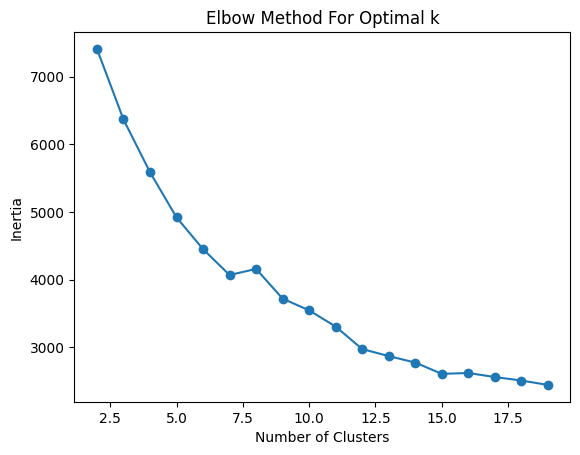

In [ ]:
from sklearn.cluster import KMeans

# Calculate inertia for different values of k
inertia = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(standardized_df_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow plot
plt.plot(range(2, 20), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

#### ***Answer 1: Determing optimal number of clusters***

#### k=15 is suggested as the optimal number for this data. At k=15, there is a noticeable bend or "elbow" in the plot, indicating a significant reduction in within-cluster sum of squares (WCSS). Choosing any k greater than 15 doesn't yield more significant improvements in the model; instead, it prevents it from becoming overly complex or fitting the data too closely.

#### In a business case, narrowing down clusters to 3 or 4 can boost efficiency by grouping together similar clusters. This strategic reduction in clusters aims to simplify the model, making it more practical while maintaining its effectiveness. This approach ensures a focused and efficient analysis of the data.


### **Q2. Run a k-means clustering algorithm with k = 3 with this sample data.**

#### ***Answer 2: Fitting K-means algorithm with k = 3***

In [ ]:
# Assigning k
k = 3

# Fit K-means model with k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
kmeans.fit(standardized_df_features)

# Getting the labels for each record based on the above fitted model
cluster_column = kmeans.labels_

# Creating a new column 'CLUSTER' to store the labels
df_features['CLUSTER'] = cluster_column

df_features.head()

<ipython-input-21-8775c3ffb2ef>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features['CLUSTER'] = cluster_column


,MEMBER_SEGMENT,GIVEN_GENDER,TENURE_DAYS,DAYS_SINCE_LAST_VISIT,DAYS_SINCE_LAST_PURCHASE,LTV_VISITS,LTV_ORDERS,LTV_DOLLARS,AVERAGE_ORDER_VALUE,CLUSTER
0,3,1,1242,67,93,77,5,569.94,113.99,1
1,2,0,4238,0,102,544,10,760.94,84.55,2
2,2,0,5133,1,28,400,124,17746.87,155.67,2
3,2,0,4300,248,248,6,1,52.00,52.00,1
4,2,0,58,3,3,32,13,2899.91,223.07,2


### ***Q3. Describe each segment’s characteristics, i.e. proportion of male/female customers, income buckets, average LTV dollars, Average Order Value, etc. How  similar and dissimilar are these clusters?***

In [ ]:
# Count occurrences of each unique value in 'GIVEN_GENDER'
gender_counts = df_features.groupby(['CLUSTER', 'GIVEN_GENDER']).size().unstack(fill_value=0)
print(gender_counts)

# Count occurrences of each unique value in 'GIVEN_GENDER'
member_segment_counts = df_features.groupby(['CLUSTER', 'MEMBER_SEGMENT']).size().unstack(fill_value=0)
print(member_segment_counts)

# Count occurrences of each unique value in 'GIVEN_GENDER'
pivot_table = pd.pivot_table(df_features, values=['TENURE_DAYS', 'DAYS_SINCE_LAST_VISIT', 'DAYS_SINCE_LAST_PURCHASE',
                                                  'LTV_VISITS', 'LTV_ORDERS', 'LTV_DOLLARS', 'AVERAGE_ORDER_VALUE'],
                                                  index='CLUSTER', aggfunc='mean')
print(pivot_table)

GIVEN_GENDER    0   1
CLUSTER              
0              32   5
1             264  83
2             538  78
MEMBER_SEGMENT   1    2   3  4
CLUSTER                       
0               20   16   0  1
1                9  323  12  3
2               84  494  29  9
         AVERAGE_ORDER_VALUE  DAYS_SINCE_LAST_PURCHASE  DAYS_SINCE_LAST_VISIT  \
CLUSTER                                                                         
0                 316.244054                 75.297297              12.189189   
1                 183.712133                247.731988             140.455331   
2                 206.635682                111.188312              18.000000   

          LTV_DOLLARS  LTV_ORDERS  LTV_VISITS  TENURE_DAYS  
CLUSTER                                                     
0        51067.946216  233.837838  788.675676  4494.297297  
1          904.907147    5.948127   46.536023  1867.314121  
2         4035.010893   25.818182  268.167208  3365.204545  


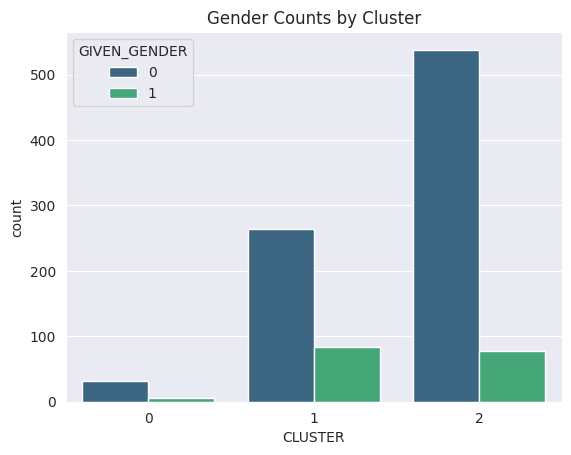

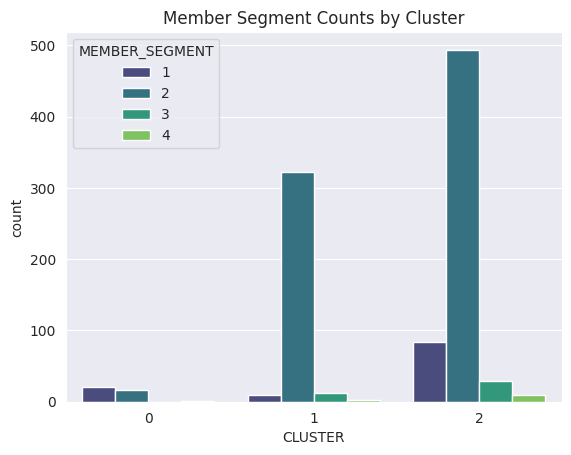

In [ ]:
# Plotting gender counts
sns.countplot(x='CLUSTER', hue='GIVEN_GENDER', data=df_features, palette='viridis')
plt.title('Gender Counts by Cluster')
plt.show()

# Plotting member segment counts
sns.countplot(x='CLUSTER', hue='MEMBER_SEGMENT', data=df_features, palette='viridis')
plt.title('Member Segment Counts by Cluster')
plt.show()

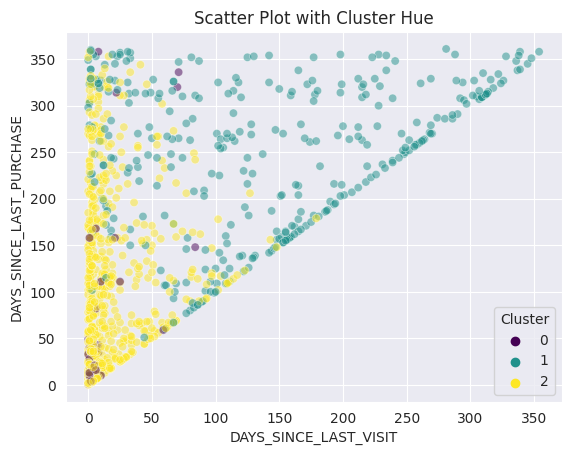

In [ ]:
sns.scatterplot(data=df_features, x='DAYS_SINCE_LAST_VISIT', y='DAYS_SINCE_LAST_PURCHASE', hue='CLUSTER', alpha=0.5, palette='viridis')

# Add labels and a legend
plt.title('Scatter Plot with Cluster Hue')
plt.xlabel('DAYS_SINCE_LAST_VISIT')
plt.ylabel('DAYS_SINCE_LAST_PURCHASE')
plt.legend(title = 'Cluster')

plt.show()

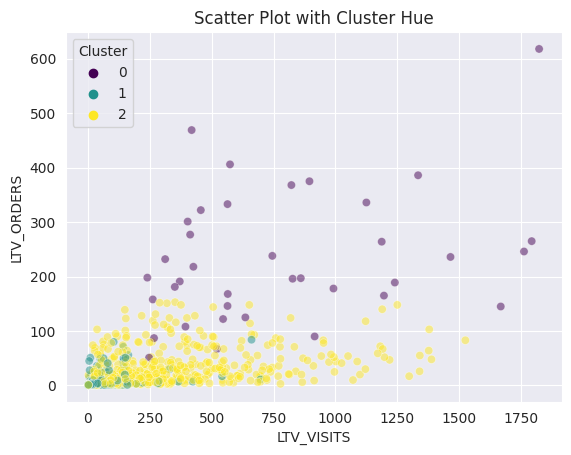

In [ ]:
sns.scatterplot(data=df_features, x='LTV_VISITS', y='LTV_ORDERS', hue='CLUSTER', alpha=0.5, palette='viridis')

# Add labels and a legend
plt.title('Scatter Plot with Cluster Hue')
plt.xlabel('LTV_VISITS')
plt.ylabel('LTV_ORDERS')
plt.legend(title = 'Cluster')

plt.show()

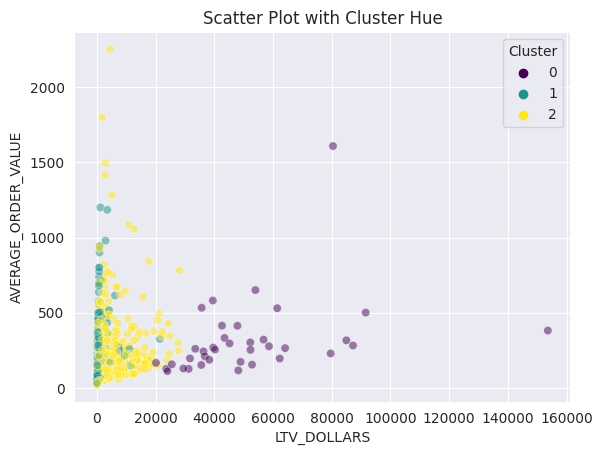

In [ ]:
sns.scatterplot(data=df_features, x='LTV_DOLLARS', y='AVERAGE_ORDER_VALUE', hue='CLUSTER', alpha=0.5, palette='viridis')

# Add labels and a legend
plt.title('Scatter Plot with Cluster Hue')
plt.xlabel('LTV_DOLLARS')
plt.ylabel('AVERAGE_ORDER_VALUE')
plt.legend(title = 'Cluster')

plt.show()

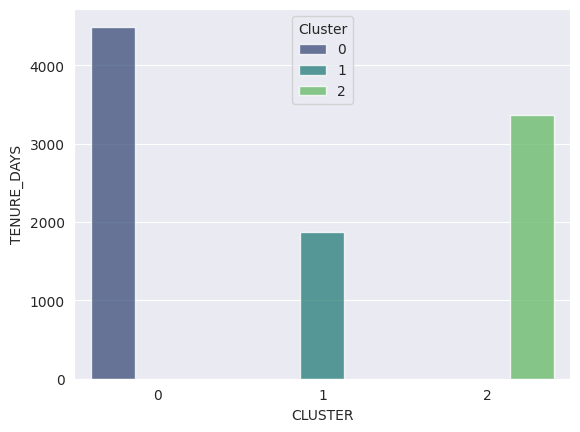

In [ ]:
bar_plot = sns.barplot(data=df_features, x='CLUSTER', y='TENURE_DAYS', hue='CLUSTER', alpha=0.8, palette='viridis', errorbar=None)
bar_plot.legend(title='Cluster', loc='upper center')
plt.show();

#### ***Answer 3: Evaluating Cluster Characteristics***

**Cluster 0**

Cluster 0 is characterized by its exclusive female clientele, comprising dedicated and high-value consumers. Despite a seemingly low average order value of  USD 750, their significant lifetime dollar value and order count reveal their loyalty and substantial purchasing behavior. This insight is derived from the cluster's remarkable average tenure of approximately 4500 days which is the highest. Furthermore, their frequent engagement with the website, reflected in a lifetime visit range of 250-1800, emphasizes their active and consistent patronage.


**Cluster 1**

Cluster 1 indicates a higher representation of females compared to males. The member segments predominantly consist of regular buyers, with few bargainers and big spenders. Most customers have visited within the last 350 days, and the time since their last purchase falls within the 50-350 day range. Customer lifetime visits are less than 750, with orders below 100. Additionally, both the average order value and lifetime dollar value are between 1500 and 20000, respectively. The tenure days for customers are generally less than 2000 days.


**Cluster 2**

Cluster 2 indicates a predominantly female customer base, with around 500 buyers, followed by approximately 90 big spenders, and smaller groups of bargain shoppers and returners. Most customers made their last purchase within the past 350 days, and their last visit within the past 150 days. The lifetime value (LTV) in terms of visits falls between 0 and 1500, while LTV in orders is in the range of 0 to 150. Average Order Value is below 1500, and LTV Dollar Value is less than 30000. The average customer tenure is around 3300 days.

### ***Q4. Would you recommend different promotional discount amounts for each  segment or the same for all? Justify your reasoning.***

#### ***Answer 4: Business Strategy for each Cluster***

**Cluster 0:**To enhance customer engagement and sales, a tiered discount strategy is proposed. This involves offering substantial discounts of 20-25% to new or less active customers, encouraging initial engagement and exploration of the brand. Meanwhile, a smaller discount of 15-20% targets moderately engaged customers, nudging them towards becoming more regular buyers. This approach is tailored to the different levels of customer familiarity and engagement with the brand, aiming to boost sales and cultivate a loyal customer base.

**Cluster 1:** This specific cluster comprises newly acquired customers, representing the segment with the least expenditure, minimal order frequency, and a relatively low number of lifetime visits. Given this insight, we propose a targeted marketing approach for these customers, offering a USD 20 discount. The rationale behind providing a moderate discount is rooted in the fact that these customers are in the early stages of their relationship with our brand, making their purchasing behavior somewhat unpredictable. However, by offering an enticing discount, we aim to cultivate their loyalty and encourage them to transition into becoming more regular and engaged buyers over time. Our strategy for this cluster is centered around attracting these new but relatively inactive customers with a USD 20 discount, with the goal of fostering increased engagement and long-term loyalty.

**Cluster 2:** Given the distinct characteristics of this customer cluster, offering them the maximum discount of USD 30 is strategically sound. The time metrics, with days since the last purchase ranging from 0 to 350 days and days since the last visit below 150 days, indicate an active and recent engagement with the platform. This group of customers indicate a good response to promotions considering the range of LTV visits and LTV orders,  along with an average order value below USD 1500 and LTV Dollar Value below USD 30,000. Consequently, offering this cluster the maximum discount of USD 30 aligns with their buying behaviors and potentially boosting overall sales.

### ***Q5. How would you test your campaign to ensure the segmentation helped?***

#### ***Answer 5: A/B Testing***

To test if the clustering helps inform our campaign strategy and yields better results as opposed to not clustering the customer base, we can perform A/B Testing on them as follows:

**1. Dividing the Dataset**

We start with a dataset that likely contains information about customers or some relevant metrics for our marketing campaign. The first step is to divide this dataset into two parts:
- Control Dataset: This is a subset of our data that serves as a baseline or control group. It represents a group that is not exposed to the changes or interventions brought about by our marketing campaign. It's like the "before" scenario
- Testing Dataset: This is the other subset of our data that will be subjected to the changes or interventions introduced by our marketing campaign. It's like the "after" scenario.
The goal here is to have a fair comparison between a group that experiences the campaign and a group that does not

**2. Equal Division of the Dataset**

This means that we are ensuring an equal number of observations or samples in both the control and testing datasets. This is important for a fair comparison, as an unequal division might introduce bias into the evaluation.

**3. K-Means/Clustering and Test Dataset**

This refers to the process of clustering, where we group similar data points in the test dataset together based on certain features or characteristics. The idea is to identify different clusters within our testing group that may react differently to the targeted marketing campaign.

**4. Campaign Testing**

With the testing dataset clustered, we can now use the insights gained from K-Means clustering to inform our marketing campaign strategy for the testing dataset. For example, you might tailor different aspects of the campaign for each identified segment. Meanwhile the control dataset remains untouched by any specific marketing interventions.

**5. Evaluation**

After the campaign, we can evaluate its effectiveness by comparing the results of the testing dataset with the control dataset. This involves analyzing key performance indicators (KPIs) or metrics relevant to our marketing goals


In summary, this process involves creating a fair and controlled environment for testing a marketing campaign by dividing the dataset into control and testing groups, clustering the testing group using K-Means clustering, and then applying the insights gained to the testing dataset. This allows for a more targeted and informed approach to the campaign and facilitates the evaluation of its impact.

We meticulously analyze the results of our targeted marketing campaigns in comparison to the untouched control dataset. A significant divergence in outcomes serves as an indicator of the efficiency and effectiveness of our clusters. Conversely, if the results show minimal variance, it signals that our current clustering approach may be less effective. In such cases, a reevaluation of our features is necessary to enhance the clustering efficacy of our dataset.
